In [1]:
import os, sys
import time
import datetime
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt 
import random


import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse, Circle

In [14]:
def draw_bkg(sw,ne):
    
    '''Initial parameter'''
    bg_path='Chengdu.png'
    
    '''Figure out'''
    img = plt.imread(bg_path)
    height, width = img.shape[:2]
    h1 = math.ceil(10./width*height)
    fig = plt.figure(figsize=(10,h1))
    ax = fig.add_subplot(111)
    xgrange, ygrange = ((sw[1], ne[1]), (sw[0], ne[0]))
    plt.xlim(xgrange)
    plt.ylim(ygrange)
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    plt.xticks(np.arange(xgrange[0], xgrange[1], 0.352/15))
    plt.yticks(np.arange(ygrange[0], ygrange[1], 0.2415/13))
    try:
        ax.imshow(img, extent=[x0, x1, y0, y1], aspect='auto', alpha=.5)
    except:
        pass
    return fig, ax, xgrange, ygrange



'''Time stamp'''
def stamp_transit(time_str):
    timeArray = time.strptime(time_str, "%Y-%m-%d %H:%M:%S")
    timeStamp = int(time.mktime(timeArray))
    return timeStamp
    
'''Time step'''

def stamp_to_step(timestamp,date_str,step):
    baseline = date_str+" 00:00:00";
    baseline = int(stamp_transit(baseline))
    current_step=int((timestamp-baseline)/step)
    return current_step

# Grid spatial Ranges

In [61]:
Grid_range=pd.read_csv('./Experiments/Demo/hexagon_grid_table.csv',header=None,
                            names = ['Grid_id','v1_lng','v1_lat',\
                                    'v2_lng','v2_lat',\
                                    'v3_lng','v3_lat',\
                                    'v4_lng','v4_lat',\
                                    'v5_lng','v5_lat',\
                                    'v6_lng','v6_lat'])

Grid_range=Grid_range.dropna(subset=['v1_lng','v1_lat',\
                                    'v2_lng','v2_lat',\
                                    'v3_lng','v3_lat',\
                                    'v4_lng','v4_lat',\
                                    'v5_lng','v5_lat',\
                                    'v6_lng','v6_lat'])

Grid_range

# X=list(Grid_range['v1_lng'])+list(Grid_range['v2_lng'])+list(Grid_range['v3_lng'])\
#     +list(Grid_range['v4_lng'])+list(Grid_range['v5_lng'])+list(Grid_range['v6_lng'])

# Y=list(Grid_range['v1_lat'])+list(Grid_range['v2_lat'])+list(Grid_range['v3_lat'])\
#     +list(Grid_range['v4_lat'])+list(Grid_range['v5_lat'])+list(Grid_range['v6_lat'])

# print(min(X),min(Y))

# print(max(X),max(Y))

,Grid_id,v1_lng,v1_lat,v2_lng,v2_lat,v3_lng,v3_lat,v4_lng,v4_lat,v5_lng,v5_lat,v6_lng,v6_lat
0,c151c79af5585f6a,104.46545,30.87166,104.46959,30.87584,104.46756,30.88151,104.46139,30.88301,104.45725,30.87883,104.45927,30.87316
1,3a1ce6f60c8696eb,103.60379,30.82045,103.60784,30.82462,103.60577,30.83025,103.59966,30.83170,103.59562,30.82752,103.59769,30.82190
2,aada8f5ae067d90a,104.17495,30.50817,104.17904,30.51233,104.17701,30.51798,104.17088,30.51947,104.16679,30.51531,104.16882,30.50966
3,4375f4117407765f,103.66009,30.95611,103.66415,30.96029,103.66208,30.96592,103.65596,30.96737,103.65190,30.96319,103.65397,30.95756
4,2bc0e4d5556e7b48,104.00960,30.96582,104.01370,30.97000,104.01164,30.97565,104.00550,30.97711,104.00140,30.97293,104.00345,30.96728
5,ace3bb4a658ef318,104.63357,30.74776,104.63773,30.75193,104.63571,30.75761,104.62954,30.75912,104.62538,30.75495,104.62740,30.74927
6,e3c98397598c1c76,103.98500,30.98716,103.98909,30.99134,103.98704,30.99699,103.98089,30.99845,103.97680,30.99427,103.97885,30.98862
7,ae1f2fa6c175a64a,103.90827,30.33643,103.91232,30.34058,103.91028,30.34621,103.90419,30.34769,103.90014,30.34354,103.90218,30.33791
8,dcee410b6fe3282e,103.44397,30.21340,103.44797,30.21755,103.44591,30.22315,103.43986,30.22461,103.43587,30.22047,103.43793,30.21486
9,5271bff5de1ffc6e,104.13052,30.89558,104.13463,30.89976,104.13258,30.90541,104.12643,30.90689,104.12232,30.90271,104.12437,30.89706


# Order Transition

In [31]:
date_str='2016-11-01'

OrderTran=pd.read_csv('./Experiments/Demo/OrderTran1101.csv')

OrderTran=OrderTran.drop(columns=['Unnamed: 0'])

OrderTran.columns = ['Order_id','Start_time','Stop_time','Pickup_Longitude','Pickup_Latitude',\
                                    'Dropoff_Longitude','Dropoff_Latitude','Reward_unit','Start_grid','Stop_grid']

OrderTran['Start_step']=OrderTran.apply(lambda x:stamp_to_step(x['Start_time'],date_str,300), axis=1)

OrderTran['Stop_step']=OrderTran.apply(lambda x:stamp_to_step(x['Stop_time'],date_str,300), axis=1)

OrderTran=OrderTran[['Order_id','Start_step','Stop_step','Start_grid','Stop_grid','Reward_unit']]

OrderTran=OrderTran.loc[OrderTran['Stop_grid']!=0]

OrderTran=OrderTran.drop_duplicates(subset=['Order_id'], keep='last', inplace=False)

OrderTran

,Order_id,Start_step,Stop_step,Start_grid,Stop_grid,Reward_unit
59,2cdab7b0f6b8ea423fb64379924c8794,149,160,2369,1,21.40
61,f56808dd28a80a4352a9dac6845ec83d,93,107,2734,1,25.10
62,1591ccc6f15e7aca4bcc8c83fdee582b,164,186,2478,49,31.96
63,8e419fe703934fe50d7c8503952790e9,189,209,2383,49,30.67
65,5e097419d2e29185654c22dbc52febac,34,45,2383,290,24.94
66,cf29e2b4873361534a10891c650e9cde,284,305,2478,267,33.98
67,5de1b3604011fa52471941501ff8ad78,231,244,2437,280,21.53
68,2d0a863aa14b4e5f69daf4605a456de3,211,217,2722,351,1.81
69,d20263896a9f3d89bb020cfa597642f8,147,162,2478,338,22.05
70,f691248b8baee33bd29845669c403191,153,171,2409,380,20.30


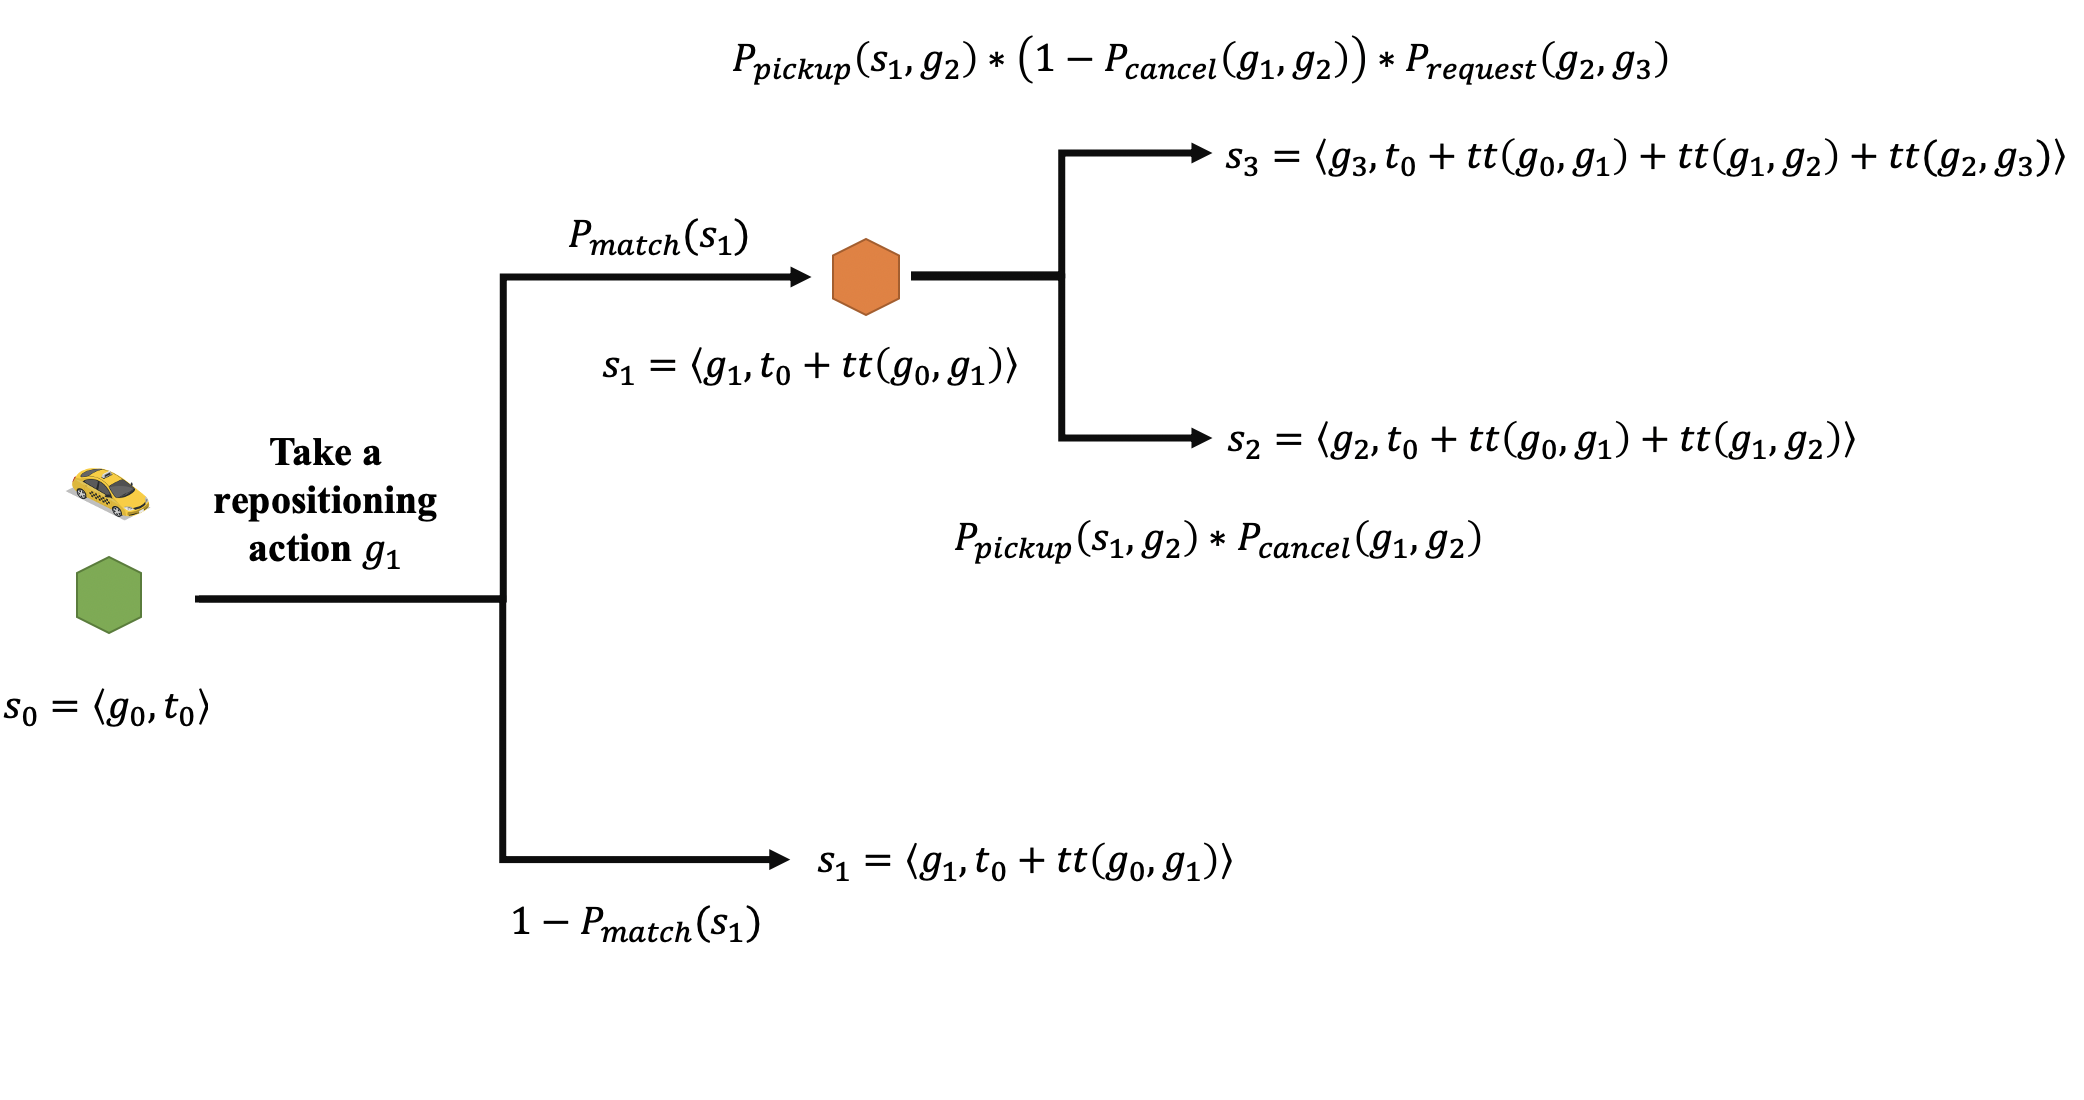

In [59]:
TRAN_PROB=OrderTran.groupby(['Start_grid','Stop_grid']).count()[['Order_id']]

TRAN_PROB['Transition']=TRAN_PROB.index

TRAN_PROB['Start_grid']=TRAN_PROB.apply(lambda x:x['Transition'][0],axis=1)

TRAN_PROB['Stop_grid']=TRAN_PROB.apply(lambda x:x['Transition'][1],axis=1)

TRAN_PROB=TRAN_PROB.reset_index(drop=True)

TRAN_PROB=TRAN_PROB.rename(index=str, columns={"Order_id": "Order_Cnt"})

TRAN_PROB=TRAN_PROB[['Start_grid','Stop_grid','Order_Cnt']]

TEMP=OrderTran.groupby(['Start_grid']).count()[['Order_id']]

TEMP['Start_grid']=TEMP.index

TEMP=TEMP.rename(index=str, columns={"Order_id": "Order_Sum"})

TEMP=TEMP.reset_index(drop=True)

TEMP=TEMP[['Start_grid','Order_Sum']]

TRAN_PROB=TRAN_PROB.merge(TEMP,on='Start_grid')

TRAN_PROB['Prob']=TRAN_PROB.apply(lambda x:round(float(x['Order_Cnt']/x['Order_Sum']),2),axis=1)

TRAN_PROB

,Start_grid,Stop_grid,Order_Cnt,Order_Sum,Prob
0,0,2111,1,27,0.04
1,0,2138,1,27,0.04
2,0,2224,1,27,0.04
3,0,2234,1,27,0.04
4,0,2275,1,27,0.04
5,0,2288,1,27,0.04
6,0,2315,1,27,0.04
7,0,2383,2,27,0.07
8,0,2423,1,27,0.04
9,0,2437,1,27,0.04


In [60]:
'''Grid Range'''

IdleT=pd.read_csv('./Experiments/Demo/IdleT.csv')

IdleT=IdleT.drop(columns=['Unnamed: 0'])

IdleT

,0,1,2,3,OgnLoc,DstLoc
0,9,000339fa73a27a67,000339fa73a27a67,1.000000,0,0
1,14,170f1114ea9e3448,000339fa73a27a67,0.052632,0,0
2,19,00062a2f9c038b7c,00062a2f9c038b7c,0.107143,1428,1428
3,18,00062a2f9c038b7c,00062a2f9c038b7c,0.125000,1428,1428
4,8,02d3ca798e694d03,00062a2f9c038b7c,0.035714,1360,1428
5,9,8c80dbb01824b78f,00062a2f9c038b7c,0.025000,1373,1428
6,16,00062a2f9c038b7c,00062a2f9c038b7c,0.352941,1428,1428
7,10,8c80dbb01824b78f,00062a2f9c038b7c,0.018868,1373,1428
8,11,8c80dbb01824b78f,00062a2f9c038b7c,0.025641,1373,1428
9,13,8c80dbb01824b78f,00062a2f9c038b7c,0.027027,1373,1428
